In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
nba = pd.read_csv('nba_players_dataset/fr/fr_2022.csv')

#Shows the column labels and first four rows.
nba.head(4)

,Unnamed: 0,PlayerName,Season,Position,Age,Team,OffensiveRating,DefensiveRating,RatingSum,scaledRatingSum
0,0,Nikola Jokić,2022,C,26,DEN,97,97,183,96
1,1,Giannis Antetokounmpo,2022,PF,27,MIL,95,93,179,94
2,2,Joel Embiid,2022,C,27,PHI,94,91,177,93
3,3,Luka Dončić,2022,PG,22,DAL,92,89,173,91


In [4]:
print(nba['scaledRatingSum'].mean())

nba_teams = nba['Team'].to_numpy()
nba_teams = np.unique(nba_teams)


77.53271028037383


In [5]:
team_srm_dict = {}
team_srm_team_list = []
team_srm_stat_list = []

for team in nba_teams:
    team_srm_team_list.append(team)
    team_srm_stat_list.append(nba.loc[nba['Team'] == team]['scaledRatingSum'].mean())

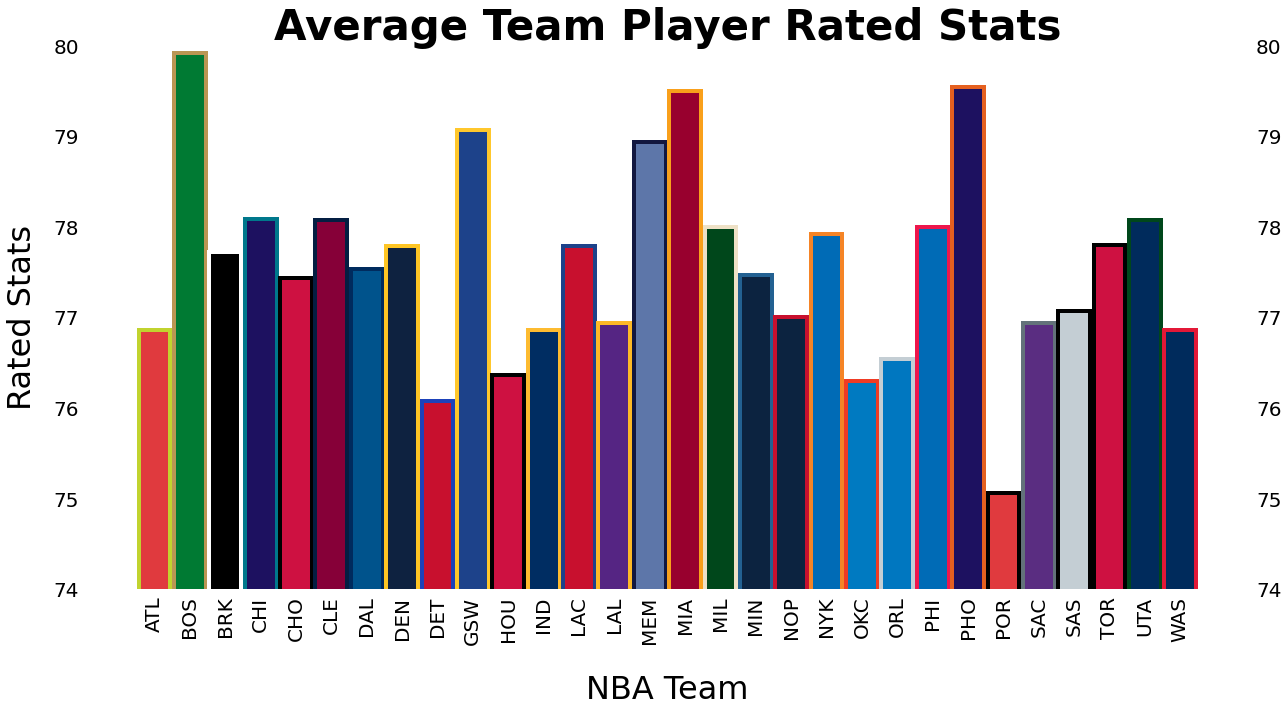

In [9]:
font = {'family': 'helvetica',
        'color': 'black',
        'weight': 'normal',
        'size': 32,
       }

title_dict = {'family': 'helvetica',
              'color': 'black',
              'weight': 'bold',
              'size': 42
             }

team_colors = ['#E03A3E', '#007A33', '#000000', '#1D1160', '#CE1141', '#860038', '#00538C', '#0E2240', 
               '#C8102E', '#1D428A', '#CE1141', '#002D62', '#C8102E', '#552583', '#5D76A9', '#98002E', 
               '#00471B', '#0C2340', '#0C2340', '#006BB6', '#007AC1', '#0077C0', '#006BB6', '#1D1160', 
               '#E03A3E', '#5A2D81', '#C4CED4', '#CE1141', '#002B5C', '#002B5C']
team_secondary = ['#C1D32F', '#BA9653', '#FFFFFF', '#00788C', '#000000', '#041E42', '#002B5E', '#FEC524', 
                 '#1D42BA', '#FFC72C', '#000000', '#FDBB30', '#1D428A', '#FDB927', '#12173F', '#F9A01B', 
                 '#EEE1C6', '#236192', '#C8102E', '#F58426', '#EF3B24', '#C4CED4', '#ED174C', '#E56020', 
                 '#000000', '#63727A', '#000000', '#000000', '#00471B', '#E31837']

fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (18, 10)
plt.rcParams["figure.autolayout"] = True
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.tick_params(labelright=True)
plt.title('Average Team Player Rated Stats', fontdict=title_dict)

ax.bar(team_srm_team_list, 
       team_srm_stat_list, 
       width=0.9, 
       linewidth=4, 
       edgecolor=team_secondary, 
       color=team_colors)
ax.set(ylim=(74, 80))
ax.set_xlabel('NBA Team', fontdict=font, labelpad=30)
ax.set_ylabel('Rated Stats', fontdict=font, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=20)

for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()



In [7]:
directory = 'nba_players_dataset/fr'

#List of average scaled rating sums for the Dallas Mavs in order from 2004 till 2022
mav_stats = []
mav_years = [int(x) for x in range(2004, 2023)]

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if filename[0] == 'f':
        temp_df = pd.read_csv(f)
        mav_stats.append(temp_df.loc[temp_df['Team'] == 'DAL']['scaledRatingSum'].mean())


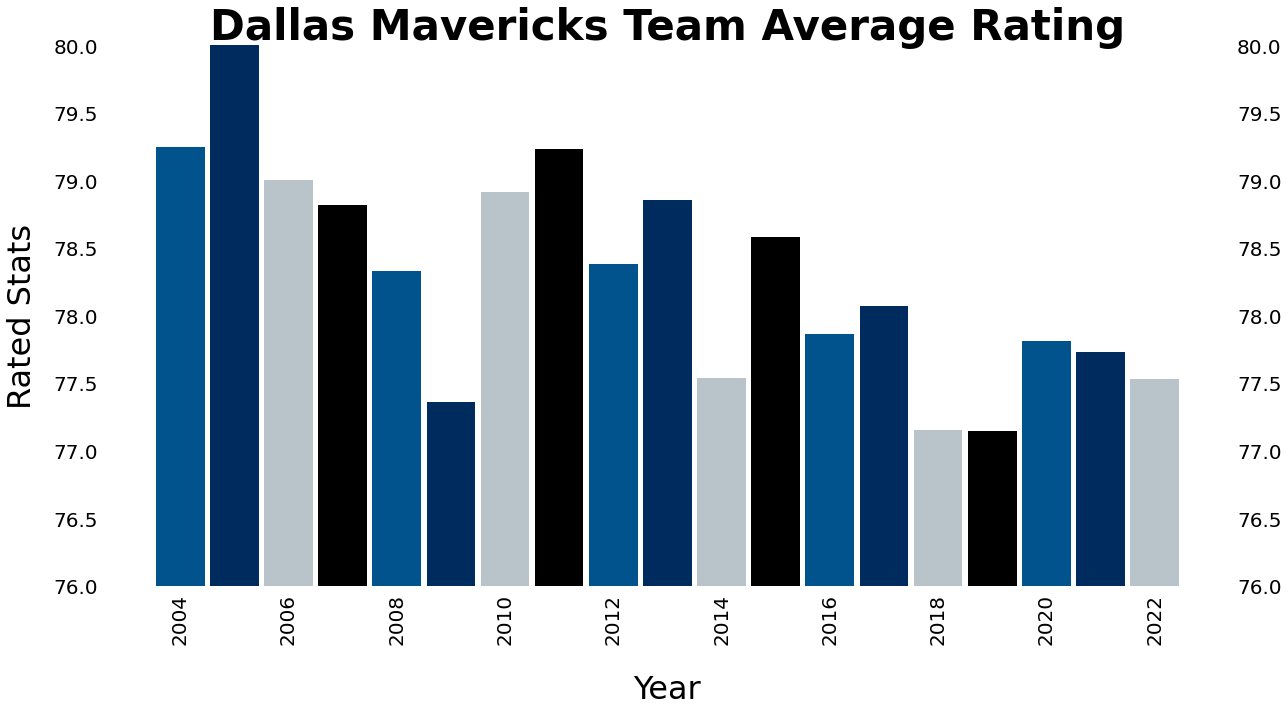

In [8]:
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (18, 10)
plt.rcParams["figure.autolayout"] = True
plt.xticks(rotation = 90)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.tick_params(labelright=True)
plt.title('Dallas Mavericks Team Average Rating', fontdict=title_dict)

ax.bar(mav_years, 
       mav_stats, 
       width=0.9, 
       linewidth=4, 
       color=['#00538C', '#002B5E', '#B8C4CA', '#000000'])
ax.set(ylim=(76, 80))
ax.set_xlabel('Year', fontdict=font, labelpad=30)
ax.set_ylabel('Rated Stats', fontdict=font, labelpad=15)
ax.set_xticks(np.arange(2004, 2023, 2))
ax.tick_params(axis='both', which='major', labelsize=20)

for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()